# Mecánica de Medios Continuos
## Por Jorge I. Zuluaga
### Cuadernos de exploración numérica
### **Campo de velocidades alrededor de un cilindro**

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.patches import Circle

Definimos el campo de velocidades:

In [61]:
def vfield(x,y,z,t,vpars):
  #Parámetros
  U,a=vpars

  #Calcula coordenadas cilíndricas
  r=np.sqrt(x**2+y**2)
  phi=np.arctan2(y,x)
  #print(phi)

  #Componentes cilíndricas de la velocidad
  vr=U*np.cos(phi)*(1-a**2/r**2)
  vphi=-U*np.sin(phi)*(1+a**2/r**2)
  #print(vr,vphi)

  #Vectores unitarios en coordenadas cilíndricas en cartesianas
  er=np.array([np.cos(phi),np.sin(phi),0])
  ephi=np.array([-np.sin(phi),np.cos(phi),0])
  #print(er,ephi)

  #Velocidad en cartesianas
  v=vr*er+vphi*ephi

  return v

In [62]:
U=1
a=0.3
vpars=(U,a)
vfield(20,0,0,1,vpars)

array([0.999775, 0.      , 0.      ])

## Campo vectorial instantáneo

(-0.825, 0.825, -0.825, 0.825)

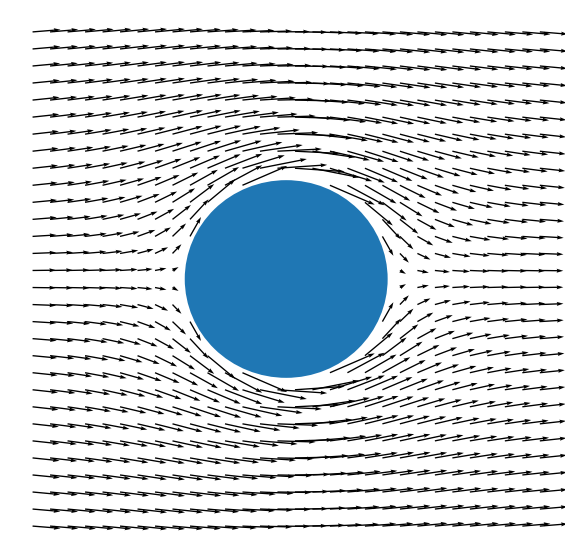

In [63]:
#Malla rectangular
NG=30
xs=np.linspace(-2.5*a,2.5*a,NG)
ys=np.linspace(-2.5*a,2.5*a,NG)
zs=np.zeros(NG)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

t=0
VXS=np.zeros_like(XS)
VYS=np.zeros_like(XS)
VZS=np.zeros_like(XS)
for i in range(NG):
  for j in range(NG):
    if np.sqrt(XS[i,j]**2+YS[i,j]**2)>=a:
      VXS[i,j],VYS[i,j],VZS[i,j]=vfield(XS[i,j],YS[i,j],ZS[i,j],t,vpars)
plt.figure(figsize=(10,10))
plt.quiver(XS,YS,VXS,VYS,scale=20)
plt.gca().add_patch(Circle((0,0),a,fill='blue'))
plt.axis("off")

## Streamlines

Definimos la ecuación diferencial:

In [64]:
def streamline(Y,t,t0,vfield,vpars):
  x,y,z=Y

  vx,vy,vz=vfield(x,y,z,t0,vpars)
  
  dxdt=vx
  dydt=vy
  dzdt=vz

  return [dxdt,dydt,dzdt]

La resolvemos para un valor definido de t0 con posiciones iniciales sobre el lado izquierdo e inferior de la malla:

(-0.75, 0.75, -0.75, 0.75)

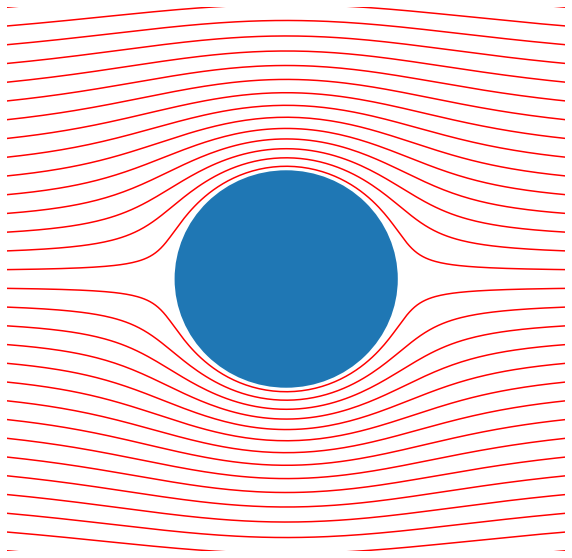

In [65]:
t0=1
vpars=(U,a)

ts=np.linspace(0,10,1000)
plt.figure(figsize=(10,10))
x=XS[0,0]
for y in YS[:,0]:
  Y0=[x,y,0]
  sols=odeint(streamline,Y0,ts,args=(t0,vfield,vpars))
  plt.plot(sols[:,0],sols[:,1],'r-')

plt.gca().add_patch(Circle((0,0),a,fill='blue'))
plt.xlim(-2.5*a,2.5*a)
plt.ylim(-2.5*a,2.5*a)
plt.axis("off")

## Contornos de la función de corriente

(-0.75, 0.75, -0.75, 0.75)

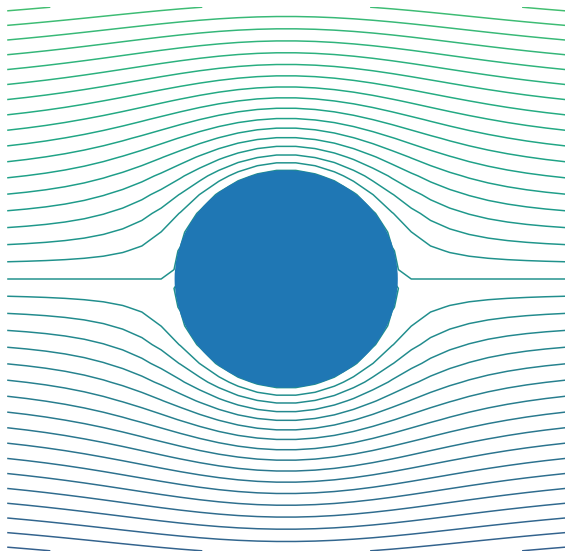

In [66]:
#Malla rectangular
NG=30
xs=np.linspace(-2.5*a,2.5*a,NG)
ys=np.linspace(-2.5*a,2.5*a,NG)
zs=np.zeros(NG)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

#Función de corriente
RS=np.sqrt(XS**2+YS**2)
PHIS=np.arctan2(YS,XS)

PSIS=U*RS*np.sin(PHIS)*(1-a**2/RS**2)

plt.figure(figsize=(10,10))
plt.contour(XS,YS,PSIS,levels=100)
plt.gca().add_patch(Circle((0,0),a,fill='blue',zorder=100))
plt.axis("off")

## Contornos de la presión

(-0.75, 0.75, -0.75, 0.75)

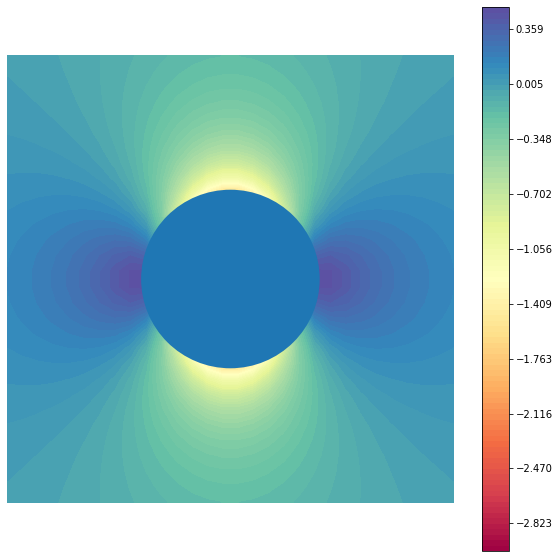

In [95]:
#Malla rectangular
NG=30
xs=np.linspace(-2.5*a,2.5*a,NG)
ys=np.linspace(-2.5*a,2.5*a,NG)
zs=np.zeros(NG)

XS,YS=np.meshgrid(xs,ys)
ZS=np.zeros_like(XS)

#Función de corriente
RS=np.sqrt(XS**2+YS**2)
PHIS=np.arctan2(YS,XS)

rho0=1
PS=0.5*rho0*U**2*a**2/RS**2*(4*np.cos(PHIS)**2-2-a**2/RS**2)
Pd=rho0*U**2/2

plt.figure(figsize=(10,10))
#plt.contourf(XS,YS,PS,levels=np.linspace(PS.min(),PS.max(),100))
#plt.contour(XS,YS,PS,levels=1000)
#plt.contourf(XS,YS,np.log10(np.abs(PS)),levels=100)
c=plt.contourf(XS,YS,PS,levels=np.linspace(-6*Pd,Pd,100),cmap="Spectral")
plt.colorbar(c)
plt.gca().add_patch(Circle((0,0),a,fill='blue',zorder=100))
plt.axis("equal")
plt.axis("off")

## Presión en la superficie del cilindro

Text(0.5, 0, '$\\phi$')

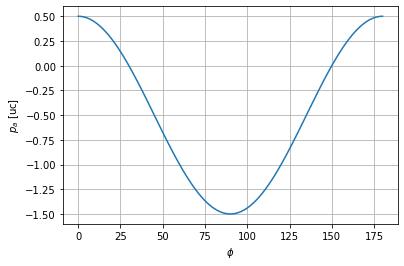

In [97]:
phis=np.linspace(0,np.pi,100)
pa=0.5*rho0*U**2*(4*np.cos(phis)**2-3)

plt.plot(phis*180/np.pi,pa)
plt.grid()
plt.ylabel(r"$p_a$ [uc]")
plt.xlabel(r"$\phi$")